# <center>HW #1</center>

<div class="alert alert-block alert-warning">Each assignment needs to be completed independently. Never ever copy others' work (even with minor modification, e.g. changing variable names). Anti-Plagiarism software will be used to check all submissions. </div>

**Instructions**: 
- Please read the problem description carefully
- Make sure to complete all requirements (shown as bullets) . In general, it would be much easier if you complete the requirements in the order as shown in the problem description
- Follow the Submission Instruction to submit your assignment

**Problem Description**

In this assignment, you'll write functions to analyze an article to find out the word distributions and key concepts. 

The packages you'll need for this assignment include numpy and pandas.

## Q1. Define a function to analyze word counts in an input sentence 


Define a function named `tokenize(text)` which does the following:
* accepts a sentence (i.e., `text` parameter) as an input
* splits the sentence into a list of tokens by **space** (including tab, and new line). 
    - e.g., `it's a hello world!!!` will be split into tokens `["it's", "a","hello","world!!!"]`  
* removes the **leading/trailing punctuations or spaces** of each token, if any
    - e.g., `world!!! -> world`, while `it's` does not change
    - hint, you can import module *string*, use `string.punctuation` to get a list of punctuations (say `puncts`), and then use function `strip(puncts)` to remove leading or trailing punctuations in each token
* only keeps tokens with 2 or more characters, i.e. `len(token)>1` 
* converts all tokens into lower case 
* find the count of each unique token and save the counts as dictionary, i.e., `{world: 1, a: 1, ...}`
* returns the dictionary 
    

In [1]:
import string
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def tokenize(text):
    
    lst = text.lower().split() # Split and convert to lowercase
    lst = [obj.strip(string.punctuation) for obj in lst] # Strip any punctuations on left or right side
    
    vocab = {} 

    for token in lst:
        if len(token) <= 1: # skip over, do not add to vocab
            continue
        else:
            if token not in vocab:  # initialize to 1
                vocab[token] = 1
            else: # already in dict, add to count
                vocab[token] += 1
            
    return vocab

In [3]:
# test your code
text = """it's a Hello World!!!
           it is Hello World again."""
tokenize(text)

{"it's": 1, 'hello': 2, 'world': 2, 'it': 1, 'is': 1, 'again': 1}

## Q2. Generate the vocabulary for a list of sentences.

- accepts **a list of sentences**, i.e., `sents`, as an input, this will be your corpus
- uses `tokenize` function you defined in Q1 to get the count dictionary for each sentence
- build a large vocabulary for all sentences (entire corpus), where the keys are the unique words, and the values are the counts for these words in all the sentences.
- sort the large dictionary by word count in descending order
- return the large vocabulary for this corpus

In [4]:
def generate_vocab(sents):
    all_vocab = {}

    for sent in sents:
        tokens = tokenize(sent)
        for t in tokens: # t is they key of each dict
            if t not in all_vocab: # initiailize to returned dict
                all_vocab[t] = tokens[t]
            else: # update count with new sentence
                all_vocab[t] += tokens[t]
    
    # Sort in decending order
    all_vocab = dict(sorted(all_vocab.items(), key=lambda x: x[1], reverse=True))
    
    return all_vocab

In [5]:
# A test document. This document can be found at https://hbr.org/2022/04/the-power-of-natural-language-processing

sents = pd.read_csv("sents.csv")
sents

,text
0,The Power of Natural Language Processing.
1,"Until recently, the conventional wisdom was th..."
2,But in the past two years language-based AI ha...
3,It has been used to write an article for The G...
4,AI even excels at cognitive tasks like program...
...,...
73,Language-Based AI Tools Are Here to Stay.
74,Powerful generalizable language-based AI tools...
75,"To begin preparing now, start understanding yo..."
76,Aggressively adopt new language-based AI techn...


In [6]:
# test this function

generate_vocab(sents.text)

{'the': 68,
 'to': 65,
 'and': 52,
 'of': 50,
 'for': 37,
 'ai': 25,
 'in': 24,
 'is': 23,
 'are': 22,
 'tasks': 20,
 'like': 20,
 'be': 20,
 'your': 20,
 'data': 19,
 'but': 18,
 'that': 17,
 'can': 17,
 'it': 15,
 'this': 14,
 'you': 14,
 'on': 13,
 'tools': 13,
 'language': 12,
 'models': 11,
 'or': 11,
 'an': 10,
 'from': 10,
 'text': 10,
 'research': 10,
 'not': 10,
 'how': 9,
 'will': 9,
 'language-based': 8,
 'has': 8,
 'even': 8,
 'may': 8,
 'more': 8,
 'model': 8,
 'was': 7,
 'better': 7,
 'at': 7,
 'still': 7,
 'do': 7,
 'gpt-3': 7,
 'which': 7,
 'as': 7,
 'work': 7,
 'my': 7,
 'elicit': 7,
 'by': 6,
 'have': 6,
 'these': 6,
 'they': 6,
 'with': 6,
 'transformative': 6,
 'their': 6,
 'foundation': 6,
 'other': 6,
 'potential': 6,
 'now': 6,
 'assets': 6,
 'value': 6,
 'organization': 6,
 'than': 5,
 'humans': 5,
 'advanced': 5,
 'most': 5,
 'been': 5,
 'nlp': 5,
 'used': 5,
 'such': 5,
 'already': 5,
 'because': 5,
 'latest': 5,
 'programmers': 5,
 'some': 5,
 'new': 5,
 'org

## Q3. Generate a document term matrix (DTM) as a numpy array


Define a function `get_dtm(sents)` as follows:
- accepts a list of sentences, i.e., `sents`, as an input
- call `tokenize` function you defined in Q1 to get the count dictionary for each sentence, and combine them into a list
- call `generate_vocab` function in Q2 to generate the large vocabulary for all sentences, and get all the words, i.e., keys
- creates a numpy array, say `dtm` with a shape (# of docs x # of unique words), and set the initial values to 0.
- fills cell `dtm[i,j]` with the count of the `j`th word in the `i`th sentence. HINT: you can loop through the list of vocabulary from step 2, and check each word's index in the large vocabulary from step 3, so that you can put the corresponding value into the correct cell. 
- returns `dtm` and `unique_words`

In [7]:
def get_dtm(sents):
    
    lst = [tokenize(s) for s in sents] # list of dicts for individual sentences

    all_words = list(generate_vocab(sents).keys()) # list of words

    
    dtm = np.zeros((len(sents), len(all_words)))
    
    for i in range(len(lst)): # ith sentence
        for j in range(len(all_words)): # jth word in ith sentence
            if all_words[j] in lst[i]:
                dtm[i][j] = lst[i][all_words[j]]

    return dtm, all_words

In [8]:
dtm, all_words = get_dtm(sents.text)

# Check if the array is correct

# randomly check one sentence
idx = 3

# get the dictionary using the function in Q1
vocab = tokenize(sents["text"].loc[idx])
print(sorted(vocab.items(), key = lambda item: item[0]))

# get all non-zero entries in dtm[idx] and create a dictionary
# these two dictionaries should be the same
sents.loc[idx]
vocab1 ={all_words[j]: dtm[idx][j] for j in np.where(dtm[idx]>0)[0]}
print(sorted(vocab1.items(), key = lambda item: item[0]))


[('ago', 1), ('ai-authored', 1), ('an', 1), ('and', 1), ('article', 1), ('been', 1), ('blog', 1), ('feats', 1), ('few', 1), ('for', 1), ('gone', 1), ('guardian', 1), ('has', 1), ('have', 1), ('it', 1), ('possible', 1), ('posts', 1), ('that', 1), ('the', 1), ('to', 1), ('used', 1), ('viral', 1), ('weren’t', 1), ('write', 1), ('years', 1)]


text    It has been used to write an article for The G...
Name: 3, dtype: object

[('ago', 1.0), ('ai-authored', 1.0), ('an', 1.0), ('and', 1.0), ('article', 1.0), ('been', 1.0), ('blog', 1.0), ('feats', 1.0), ('few', 1.0), ('for', 1.0), ('gone', 1.0), ('guardian', 1.0), ('has', 1.0), ('have', 1.0), ('it', 1.0), ('possible', 1.0), ('posts', 1.0), ('that', 1.0), ('the', 1.0), ('to', 1.0), ('used', 1.0), ('viral', 1.0), ('weren’t', 1.0), ('write', 1.0), ('years', 1.0)]


## Q4 Analyze DTM Array 


**Don't use any loop in this task**. You should use array operations to take the advantage of high performance computing.

Define a function named `analyze_dtm(dtm, words)` which:
* takes an array $dtm$ and $words$ as an input, where $dtm$ is the array you get in Q3 with a shape $(m \times n)$, and $words$ contains an array of words corresponding to the columns of $dtm$.
* calculates the sentence frequency for each word, say $j$, e.g. how many sentences contain word $j$. Save the result to array $df$ ($df$ has shape of $(n,)$ or $(1, n)$).
* normalizes the word count per sentence: divides word count, i.e., $dtm_{i,j}$, by the total number of words in sentence $i$. Save the result as an array named $tf$ ($tf$ has shape of $(m,n)$).
* for each $dtm_{i,j}$, calculates $tf\_idf_{i,j} = \frac{tf_{i, j}}{df_j}$, i.e., divide each normalized word count by the sentence frequency of the word. The reason is, if a word appears in most sentences, it does not have the discriminative power and often is called a `stop` word. The inverse of $df$ can downgrade the weight of such words. $tf\_idf$ has shape of $(m,n)$
* prints out the following:
    
    - the total number of words in the document represented by $dtm$
    - the most frequent top 10 words in this document, compare with the results from Q2, and briefly explain the difference 
    - words with the top 10 largest $df$ values (show words and their $df$ values)
    - the longest sentence (i.e., the one with the most words)
    - top-10 words with the largest $tf\_idf$ values in the longest sentence (show words and values) 
* returns the $tf\_idf$ array.



Note, for all the steps, **do not use any loop**. Just use array functions and broadcasting for high performance computation.

In [136]:
def analyze_dtm(dtm, words, sents):

    m, n = dtm.shape # m = rows, n = cols

    df = np.sum(dtm, axis=0)

    tf = dtm / np.sum(dtm, axis=1).reshape(-1, 1)
    
    tfidf = tf / df


    #np.sum(dtm, axis=1)
    print("The total number of words: ", int(dtm.sum()), sep='\n')
    print()
    print("The top 10 frequent words with their counts: ", sorted(zip(words, (np.sum(dtm, axis=1).astype(int))), key=lambda x: x[1], reverse=True)[:10], sep='\n')
    print()
    print("The top 10 words with highest df values: ", sorted(zip(words[np.argsort(df)[::-1]], df.astype(int)), key=lambda x: x[1], reverse=True)[:10], sep='\n')
    print()
    print("The longest sentence: ", sents[np.argmax(np.sum(dtm, axis=1))], sep='\n')
    print()
    print("The top 10 words with highest tfidf values in the longest sentence: ", sorted(zip(words, tfidf[np.argmax(np.sum(dtm, axis=1))]), key=lambda x: x[1], reverse=True)[:10], sep='\n')
    
    
    return tfidf

In [137]:
words = np.array(all_words)

analyze_dtm(dtm, words, sents.text)


The total number of words: 
1853

The top 10 frequent words with their counts: 
[('tasks', 50), ('and', 49), ('but', 45), ('value', 43), ('are', 42), ('even', 41), ('such', 39), ('can', 38), ('they', 37), ('like', 36)]

The top 10 words with highest df values: 
[('the', 68), ('to', 65), ('and', 52), ('of', 50), ('for', 37), ('ai', 25), ('in', 24), ('is', 23), ('are', 22), ('be', 20)]

The longest sentence: 
Language models are already reshaping traditional text analytics, but GPT-3 was an especially pivotal language model because, at 10x larger than any previous model upon release, it was the first large language model, which enabled it to perform even more advanced tasks like programming and solving high school–level math problems.

The top 10 words with highest tfidf values in the longest sentence: 
[('reshaping', 0.02), ('especially', 0.02), ('pivotal', 0.02), ('10x', 0.02), ('larger', 0.02), ('upon', 0.02), ('release', 0.02), ('enabled', 0.02), ('perform', 0.02), ('solving', 0.02)]

array([[0.00245098, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0005071 , 0.0005305 , 0.00066313, ..., 0.        , 0.        ,
        0.        ],
       [0.00060024, 0.        , 0.00039246, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00063939, 0.0006689 , 0.00083612, ..., 0.        , 0.        ,
        0.        ],
       [0.0005071 , 0.00106101, 0.00066313, ..., 0.03448276, 0.        ,
        0.        ],
       [0.00058824, 0.00184615, 0.00076923, ..., 0.        , 0.04      ,
        0.04      ]])

### Bonus question (1 point)
1. Suppose your machine learning model returns a list of probabilities as the output. Write a function to do the following:
    - Given a threshold, say $th$, if a probability > $th$, the prediction is positive; otherwise, negative
    - Compare the prediction with the ground truth labels to calculate the confusion matrix as [[TN, FN],[FP,TP]], where:
        * True Positives (TP): the number of correct positive predictions
        * False Positives (FP): the number of postive predictives which actually are negatives
        * True Negatives (TN): the number of correct negative predictions
        * False Negatives (FN): the number of negative predictives which actually are positives
    - Calculate **precision** as $TP/(TP+FP)$ and **recall** as $TP/(TP+FN)$
    - return precision and recall. 
2. Call this function with $th$ varying from 0.05 to 0.95 with an increase of 0.05. Plot a line chart to see how precision and recall change by $th$

In [144]:
prob =np.array([0.28997326, 0.10166073, 0.10759583, 0.0694934 , 0.6767239 ,
       0.01446897, 0.15268748, 0.15570522, 0.12159665, 0.22593857,
       0.98162019, 0.47418329, 0.09376987, 0.80440782, 0.88361167,
       0.21579844, 0.72343069, 0.06605903, 0.15447797, 0.10967575,
       0.93020135, 0.06570391, 0.05283854, 0.09668829, 0.05974545,
       0.04874688, 0.07562255, 0.11103822, 0.71674525, 0.08507381,
       0.630128  , 0.16447478, 0.16914903, 0.1715767 , 0.08040751,
       0.7001173 , 0.04428363, 0.19469664, 0.12247959, 0.14000294,
       0.02411263, 0.26276603, 0.11377073, 0.07055441, 0.2021157 ,
       0.11636899, 0.90348488, 0.10191679, 0.88744523, 0.18938904])

truth = np.array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [142]:
def evaluate_performance(prob: np.array, truth, th):
    conf = [[0, 0], [0, 0]]
    
    predictions = np.where(prob > th, 1, 0)

    for i in range(len(predictions)):
        if predictions[i] == 0 and truth[i] == 0: # TN
            conf[0][0] += 1
        elif predictions[i] == 0 and truth[i] == 1: # FN
            conf[0][1] += 1
        elif predictions[i] == 1 and truth[i] == 0: # FP
            conf[1][0] += 1
        else: # TP, predictions[i] == 1 and truth[i] == 1
            conf[1][1] += 1
    
    prec = conf[1][1] / (conf[1][1] + conf[1][0])
    
    rec = conf[1][1] / (conf[1][1] + conf[0][1])
    

    
 

    return {"R0":prec, "R1":rec}

In [145]:
# test with one value
evaluate_performance(prob, truth, 0.05)

{'R0': 0.2608695652173913, 'R1': 1.0}

In [146]:
# Test with threhold grid
th_list=np.arange(0.05,1.00,0.05)

for th in th_list:
    print(f"Threshold: {th}")
    print(evaluate_performance(prob, truth, th))
    print()


Threshold: 0.05
{'R0': 0.2608695652173913, 'R1': 1.0}

Threshold: 0.1
{'R0': 0.34285714285714286, 'R1': 1.0}

Threshold: 0.15000000000000002
{'R0': 0.48, 'R1': 1.0}

Threshold: 0.2
{'R0': 0.7058823529411765, 'R1': 1.0}

Threshold: 0.25
{'R0': 0.8571428571428571, 'R1': 1.0}

Threshold: 0.3
{'R0': 0.9166666666666666, 'R1': 0.9166666666666666}

Threshold: 0.35000000000000003
{'R0': 0.9166666666666666, 'R1': 0.9166666666666666}

Threshold: 0.4
{'R0': 0.9166666666666666, 'R1': 0.9166666666666666}

Threshold: 0.45
{'R0': 0.9166666666666666, 'R1': 0.9166666666666666}

Threshold: 0.5
{'R0': 0.9090909090909091, 'R1': 0.8333333333333334}

Threshold: 0.55
{'R0': 0.9090909090909091, 'R1': 0.8333333333333334}

Threshold: 0.6000000000000001
{'R0': 0.9090909090909091, 'R1': 0.8333333333333334}

Threshold: 0.6500000000000001
{'R0': 0.9, 'R1': 0.75}

Threshold: 0.7000000000000001
{'R0': 0.8888888888888888, 'R1': 0.6666666666666666}

Threshold: 0.7500000000000001
{'R0': 1.0, 'R1': 0.5}

Threshold: 0.8
{

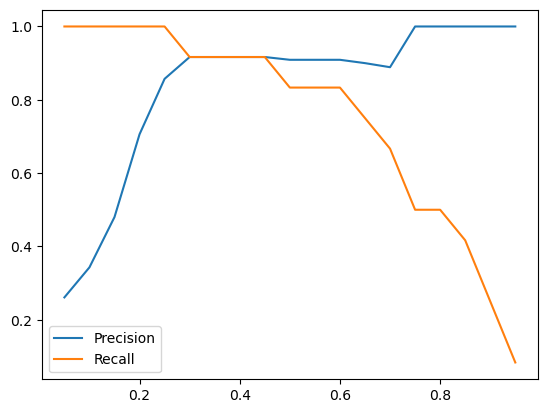

In [147]:
import matplotlib.pyplot as plt

plt.plot(th_list, [evaluate_performance(prob, truth, th)["R0"] for th in th_list], label="Precision")
plt.plot(th_list, [evaluate_performance(prob, truth, th)["R1"] for th in th_list], label="Recall")
plt.legend()
plt.show()